In [89]:
from splinter import Browser
from bs4 import BeautifulSoup as soup
from webdriver_manager.chrome import ChromeDriverManager
import pandas as pd

In [90]:
executable_path = {'executable_path': ChromeDriverManager().install()}
browser = Browser('chrome' , **executable_path , headless = False)

In [91]:
url = 'https://data-class-mars-challenge.s3.amazonaws.com/Mars/index.html'
browser.visit(url)

In [92]:
html = browser.html 
mars_temp = soup(html , 'html.parser')

In [93]:
mars_temp.head.title.text

'Mars Temperature Data'

In [94]:
df  = pd.read_html (url)

In [95]:
mars_temp_df = df[0]
mars_temp_df

,id,terrestrial_date,sol,ls,month,min_temp,pressure
0,2,2012-08-16,10,155,6,-75.0,739.0
1,13,2012-08-17,11,156,6,-76.0,740.0
2,24,2012-08-18,12,156,6,-76.0,741.0
3,35,2012-08-19,13,157,6,-74.0,732.0
4,46,2012-08-20,14,157,6,-74.0,740.0
...,...,...,...,...,...,...,...
1862,1889,2018-02-23,1973,133,5,-78.0,730.0
1863,1892,2018-02-24,1974,134,5,-77.0,729.0
1864,1894,2018-02-25,1975,134,5,-76.0,729.0
1865,1893,2018-02-26,1976,135,5,-77.0,728.0


In [96]:
mars_temp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1867 entries, 0 to 1866
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                1867 non-null   int64  
 1   terrestrial_date  1867 non-null   object 
 2   sol               1867 non-null   int64  
 3   ls                1867 non-null   int64  
 4   month             1867 non-null   int64  
 5   min_temp          1867 non-null   float64
 6   pressure          1867 non-null   float64
dtypes: float64(2), int64(4), object(1)
memory usage: 102.2+ KB


In [97]:
# change datatype object to datetime 
mars_temp_df['terrestrial_date'] = pd.to_datetime(mars_temp_df['terrestrial_date'])
mars_temp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1867 entries, 0 to 1866
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   id                1867 non-null   int64         
 1   terrestrial_date  1867 non-null   datetime64[ns]
 2   sol               1867 non-null   int64         
 3   ls                1867 non-null   int64         
 4   month             1867 non-null   int64         
 5   min_temp          1867 non-null   float64       
 6   pressure          1867 non-null   float64       
dtypes: datetime64[ns](1), float64(2), int64(4)
memory usage: 102.2 KB


### **How many months exist on Mars?**

In [98]:
no_month = mars_temp_df['month'].nunique()
print(f"There are {no_month} months on Mars.")

There are 12 months on Mars.


## How many Martian (and not Earth) days worth of data exist in the scraped dataset?

In [99]:
no_days = mars_temp_df['sol'].sum()
print(f"There are {no_days} days worth of data exist in the scraped dataset ." )

There are 1896256 days worth of data exist in the scraped dataset .


In [100]:
mars_temp_df1=mars_temp_df.groupby(['month'])['min_temp'].mean().to_frame().reset_index()
mars_temp_df1

,month,min_temp
0,1,-77.160920
1,2,-79.932584
2,3,-83.307292
3,4,-82.747423
4,5,-79.308725
5,6,-75.299320
6,7,-72.281690
7,8,-68.382979
8,9,-69.171642
9,10,-71.982143


## Which month is the coldest month

In [101]:
coldest_month = mars_temp_df1.loc[mars_temp_df1['min_temp'] == mars_temp_df1['min_temp'].min()]
coldest_month

,month,min_temp
2,3,-83.307292


## Which month is the warmest month

In [102]:
warmest_month = mars_temp_df1.loc[mars_temp_df1['min_temp'] == mars_temp_df1['min_temp'].max()]
warmest_month

,month,min_temp
7,8,-68.382979


<AxesSubplot:title={'center':'Average Temperature of All Martian Months'}, xlabel='Martian Months', ylabel='Average Temperature'>

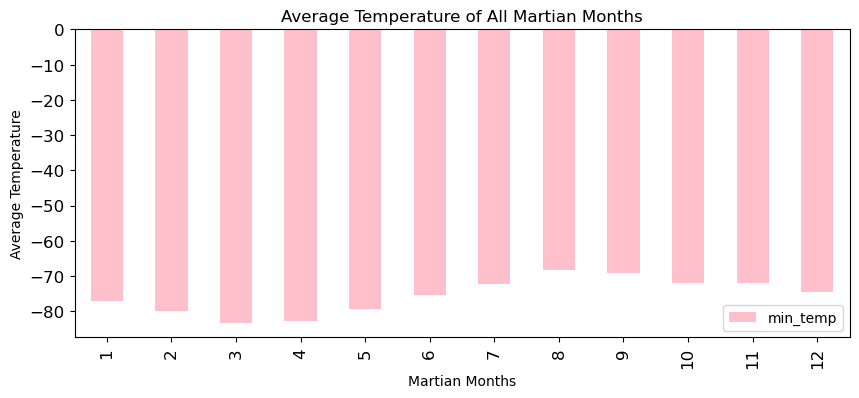

In [114]:
# Get the answer by averaging the minimum daily temperature of all the months. Plot the results as a bar chart.
mars_temp_df1.plot.bar(x='month', y='min_temp', 
                           title = 'Average Temperature of All Martian Months',
                           xlabel = 'Martian Months',
                           ylabel = 'Average Temperature',
                           fontsize = 'large',
                           figsize = (10,4),
                           color = 'pink')

In [104]:
mars_pressure_df1=mars_temp_df.groupby(['month'])['pressure'].mean().to_frame().reset_index()
lowest_avg_pressure = mars_pressure_df1['pressure'].min()

## Which month has the lowest pressure

In [105]:
lowest_pressure =mars_pressure_df1.loc[mars_pressure_df1['pressure'] == mars_pressure_df1['pressure'].min()] 
lowest_pressure

,month,pressure
5,6,745.054422


## Which month has the highest pressure

In [106]:
highest_pressure =mars_pressure_df1.loc[mars_pressure_df1['pressure'] == mars_pressure_df1['pressure'].max()] 
highest_pressure

,month,pressure
8,9,913.30597


<AxesSubplot:title={'center':'Average Atmospheric Pressure of All Martian Months'}, xlabel='Martian Months', ylabel='Average Atmospheric Pressure'>

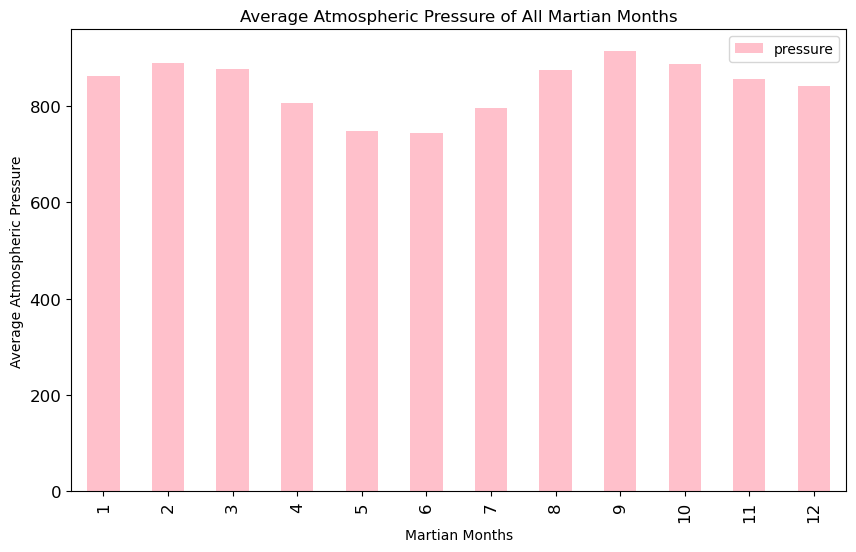

In [113]:
# Get the answer by averaging the daily atmospheric pressure of all the months. Plot the results as a bar chart.
mars_pressure_df1.plot.bar(x='month', y='pressure', 
                           title = 'Average Atmospheric Pressure of All Martian Months',
                           xlabel = 'Martian Months',
                           ylabel = 'Average Atmospheric Pressure',
                           fontsize = 'large',
                           figsize = (10,6),
                           color = 'pink')


## About how many terrestrial (Earth) days exist in a Martian year? 

In [107]:
import matplotlib.pyplot as plt

Text(0, 0.5, 'Martian Days')

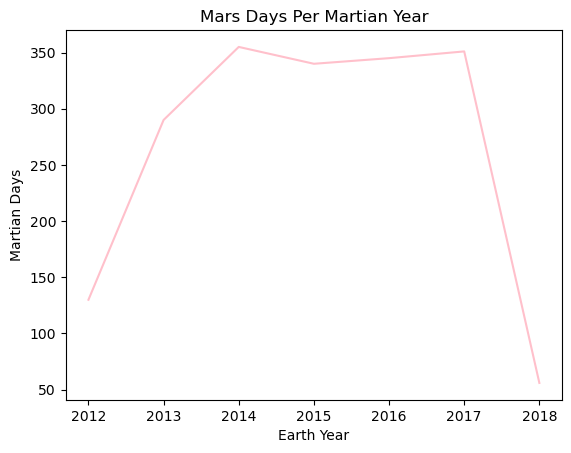

In [115]:
year = pd.DatetimeIndex(mars_temp_df['terrestrial_date']).year
count_per_year = mars_temp_df.groupby(year)['min_temp'].count()
plt.plot(count_per_year, color = 'pink')
plt.title("Mars Days Per Martian Year")
plt.xlabel("Earth Year")
plt.ylabel("Martian Days")

In [109]:
# Export the DataFrame to a CSV file.
mars_temp_data = "Resources//mars_temp_data.csv"
mars_temp_df.to_csv(mars_temp_data , index = False)

In [110]:
browser.quit()